# Logistic Regression Baseline
## Answer: Test accuracy = 94 %

## 1. Import necessary libary and datasets

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import PIL.Image as Image
import matplotlib.pyplot as plt

with np.load('trainfeature.npz', allow_pickle=False) as npz_file:
    traindata = dict(npz_file.items())

X_tr = traindata['features']
y_tr = traindata['targets']

with np.load('validfeature.npz', allow_pickle=False) as npz_file:
    validdata = dict(npz_file.items())

X_va = validdata['features']
y_va = validdata['targets']

with np.load('testfeature.npz', allow_pickle=False) as npz_file:
    testdata = dict(npz_file.items())

X_te = testdata['features']
y_te = testdata['targets']

## 2. Evaluate the logistic regression baseline with regularization strength = 1.

In [2]:
# Create the estimator
pipe = Pipeline([('logreg', LogisticRegression(multi_class='ovr',solver='liblinear'))])

# Fit it to train data
pipe.fit(X_tr, y_tr)

print('Validation accuracy:',pipe.score(X_va, y_va),'. Test accuracy:',pipe.score(X_te, y_te))

Validation accuracy: 0.8920863309352518 . Test accuracy: 0.92


## 3. Tune its regularization strength parameter with cross-validated grid-search.
The best regularization strength c is 0.031 according to mean_test_score.

In [3]:
# Populate regularization strength inputs
grid = {
    'logreg__C': np.logspace(-10, 10, num=100)
}
grid_cv = GridSearchCV(pipe, grid, cv=5, return_train_score=True, n_jobs=2)

#combine test and validation datasets
X = np.concatenate((X_tr,X_va),axis=0)
y = np.concatenate((y_tr,y_va),axis=0)

# Fit estimator
grid_cv.fit(X, y)

# Get the results with "cv_results_"
grid_cv.cv_results_.keys()
# Returns: dict_keys(['mean_fit_time', 'std_fit_time','mean_score_time', ...

# Collect results in a DataFrame
cv_results = pd.DataFrame(grid_cv.cv_results_)

# Print a few interesting columns
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_logreg__C']
cv_results[cols].sort_values('mean_test_score', ascending=False).head(20)

C:\Users\lecpi\.conda\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,mean_test_score,std_test_score,mean_train_score,std_train_score,param_logreg__C
42,0.909308,0.016177,0.995224,0.001470,0.0305386
41,0.909308,0.017170,0.991650,0.002920,0.0191791
39,0.906921,0.022250,0.976142,0.004962,0.00756463
40,0.906921,0.022250,0.986885,0.004018,0.012045
38,0.902148,0.023444,0.968396,0.007616,0.00475081
48,0.902148,0.009584,1.000000,0.000000,0.497702
47,0.902148,0.009584,1.000000,0.000000,0.312572
49,0.899761,0.011120,1.000000,0.000000,0.792483
46,0.899761,0.009819,1.000000,0.000000,0.196304
43,0.899761,0.011358,0.995821,0.001470,0.048626


 - Create an estimator pipeline using regularization strength of 0.031 for the next task.

In [4]:
pipe2 = Pipeline([('logreg', LogisticRegression(C=0.031,multi_class='ovr',solver='liblinear'))])

# Fit it to train data
pipe2.fit(X, y)

print('Test accuracy:',pipe2.score(X_te, y_te))

Test accuracy: 0.94


## 4. Pick ten images and compute the probability for each class using the predict_proba() function of your estimator. Plot the results for each image and comment your findings. For example, you can plot the ten images in subplots and collect the probabilities in a DataFrame.

,bike,car,motorcycle,other,truck,van
image,,,,,,
bike-0100.png,0.966476,0.006801,0.004807,0.013500,0.003246,0.005170
bike-0105.png,0.684930,0.014387,0.176581,0.105871,0.015473,0.002758
bike-0110.png,0.975709,0.002723,0.002759,0.010215,0.005250,0.003344
car-0100.png,0.001842,0.967063,0.001766,0.012955,0.000787,0.015587
car-0105.png,0.016341,0.873516,0.004974,0.013572,0.011789,0.079808
motorcycle-0079.png,0.003158,0.016903,0.880820,0.095668,0.003096,0.000355
motorcycle-0084.png,0.014916,0.020337,0.940855,0.008040,0.009422,0.006430
other-0052.png,0.025495,0.011294,0.021523,0.773163,0.105431,0.063094
truck-0066.png,0.001706,0.005069,0.007209,0.288844,0.664299,0.032873


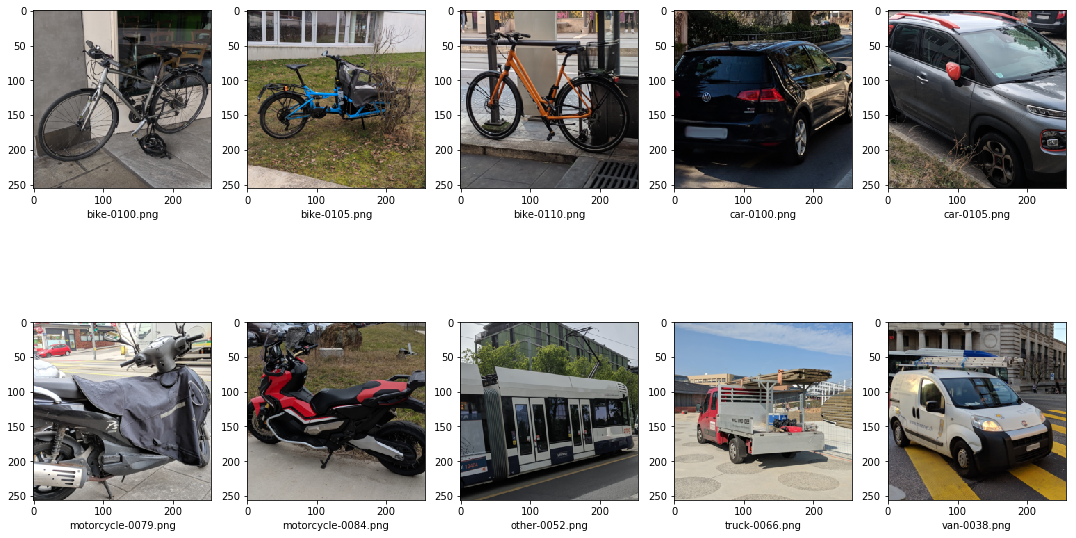

In [5]:
# read the file names in the test dataset and save them for later retrieval
import os
a = open("testfilenames.txt", "w")
for path, subdirs, files in os.walk('swissroads/test/'):
   for filename in files:
     f = os.path.join(filename)
     a.write(str(filename)+"\n") 
    
a.close()

# initialize probability result container
proba_results = []

# interate through the files in the test datasets
for i in range(0,50,5):
    # open the saved test filenames for association in the loop
    f = open("testfilenames.txt", "r")
    a = np.reshape(X_te[i,:], (1, -1))
    proba_results.append({
        'image': f.readlines()[i].rstrip(),
        'bike': pipe2.predict_proba(a)[0,0],
        'car': pipe2.predict_proba(a)[0,1],
        'motorcycle': pipe2.predict_proba(a)[0,2],
        'truck': pipe2.predict_proba(a)[0,4],
        'van': pipe2.predict_proba(a)[0,5],
        'other': pipe2.predict_proba(a)[0,3]
    })
    
f.close()

# convert the container into dataframe
proba_results= pd.DataFrame(proba_results)
# set the index of the dataframe into image name
proba_results= proba_results.set_index('image')

# load the pixel files of the test data sets
with np.load('testpixels.npz', allow_pickle=False) as npz_file:
    testdata = dict(npz_file.items())
X_te_pixel = testdata['features']

# Create an iterator for the image indexing of the subplot
countimg = 1
for i in range(0,50,5):
    f = open("testfilenames.txt", "r")
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.subplot(2,5,countimg)
    plt.xlabel(f.readlines()[i].rstrip())
    plt.imshow(X_te_pixel[i,:]/255)
    countimg = countimg + 1

f.close()

proba_results.head(10)

## 5. Finally, vary the regularization strength of your estimator. What is the effect on the probabilities? Write your observations in a markdown cell.

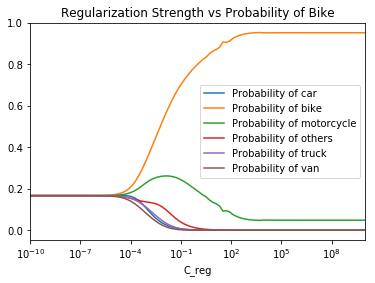

In [6]:
# Initialize one test dataset of bike for checking the relationship between regularization strength and probability.
a = np.reshape(X_te[5,:], (1, -1))

# Populate regularization strength inputs
C_reg = np.logspace(-10, 10, num=100)

# initialize results container
C_results = []

for c in C_reg:
    # initialise different logistic regressor with different regularization strength
    clf = LogisticRegression(C=c,multi_class='ovr',solver='liblinear').fit(X_tr, y_tr)
    C_results.append({
        'C_reg': c,
        'Probability of bike': clf.predict_proba(a)[0,0],
        'Probability of car': clf.predict_proba(a)[0,1],
        'Probability of motorcycle': clf.predict_proba(a)[0,2],
        'Probability of others': clf.predict_proba(a)[0,3],
        'Probability of truck': clf.predict_proba(a)[0,4],
        'Probability of van': clf.predict_proba(a)[0,5]
    })
    
C_results = pd.DataFrame(C_results)

C_results.plot(x='C_reg',y=['Probability of car','Probability of bike','Probability of motorcycle','Probability of others','Probability of truck','Probability of van'],title='Regularization Strength vs Probability of Bike',logx=True)

## Observation: Probability of bike for one of the bike's test datasets increase logarithmically with the regularization strength. The higher the C, the higher the significance of the loss function for minimization, thus the regressor will minimize the loss function rather than the penalization function. As the lower regularization strength reduces on the effect of the loss function, the probability of the bike is limited by the uniform probability of the bike within the 6 classes = 1/6 (0.17). 